# 3.8 多层感知机

In [2]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pylab as plt
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l

print(torch.__version__)

1.8.1


## 3.8.2 激活函数

In [3]:
def xyplot(x_vals, y_vals, name):
    d2l.set_figsize(figsize=(4, 2))
    d2l.plt.plot(x_vals.detach().numpy(), y_vals.detach().numpy())
    d2l.plt.xlabel('x')
    d2l.plt.ylabel(name + '(x)')

### 3.8.2.1 ReLU函数

tensor([-8.0000, -7.9000, -7.8000, -7.7000, -7.6000, -7.5000, -7.4000, -7.3000,
        -7.2000, -7.1000, -7.0000, -6.9000, -6.8000, -6.7000, -6.6000, -6.5000,
        -6.4000, -6.3000, -6.2000, -6.1000, -6.0000, -5.9000, -5.8000, -5.7000,
        -5.6000, -5.5000, -5.4000, -5.3000, -5.2000, -5.1000, -5.0000, -4.9000,
        -4.8000, -4.7000, -4.6000, -4.5000, -4.4000, -4.3000, -4.2000, -4.1000,
        -4.0000, -3.9000, -3.8000, -3.7000, -3.6000, -3.5000, -3.4000, -3.3000,
        -3.2000, -3.1000, -3.0000, -2.9000, -2.8000, -2.7000, -2.6000, -2.5000,
        -2.4000, -2.3000, -2.2000, -2.1000, -2.0000, -1.9000, -1.8000, -1.7000,
        -1.6000, -1.5000, -1.4000, -1.3000, -1.2000, -1.1000, -1.0000, -0.9000,
        -0.8000, -0.7000, -0.6000, -0.5000, -0.4000, -0.3000, -0.2000, -0.1000,
         0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,
         0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,
         1.6000,  1.7000,  1.8000,  1.90

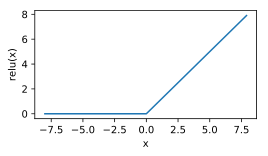

In [4]:
x = torch.arange(-8.0, 8.0, .1, requires_grad=True)
print(x)
y = x.relu()
xyplot(x, y, 'relu')

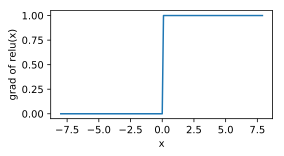

In [5]:
y.sum().backward()
xyplot(x, x.grad, 'grad of relu')

### 3.8.2.2 sigmoid函数

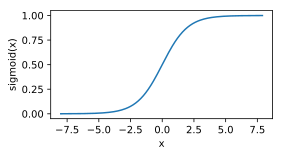

In [12]:
# torch.Tensor.sigmoid
y = x.sigmoid()
xyplot(x, y, 'sigmoid')

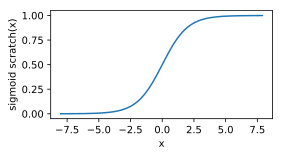

In [17]:
# scratch sigmoid
def sigmoid(X):
    return 1 / (1 + (1 / X.exp()))
    
y = sigmoid(x)

xyplot(x, sigmoid(x), 'scratch sigmoid')



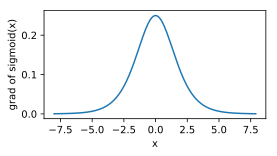

In [7]:
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of sigmoid')

### 3.8.2.3 tanh函数

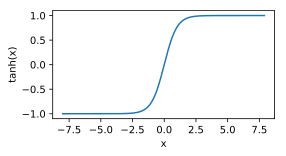

In [8]:
y = x.tanh()
xyplot(x, y, 'tanh')

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9999, -0.9999, -0.9999,
        -0.9999, -0.9998, -0.9998, -0.9998, -0.9997, -0.9996, -0.9996, -0.9995,
        -0.9993, -0.9992, -0.9990, -0.9988, -0.9985, -0.9982, -0.9978, -0.9973,
        -0.9967, -0.9959, -0.9951, -0.9940, -0.9926, -0.9910, -0.9890, -0.9866,
        -0.9837, -0.9801, -0.9757, -0.9705, -0.9640, -0.9562, -0.9468, -0.9354,
        -0.9217, -0.9051, -0.8854, -0.8617, -0.8337, -0.8005, -0.7616, -0.7163,
        -0.6640, -0.6044, -0.5370, -0.4621, -0.3799, -0.2913, -0.1974, -0.0997,
         0.0000,  0.0997,  0.1974,  0.2913,  0.3799,  0.4621,  0.5370,  0.6044,
         0.6640,  0.7163,  0.7616,  0.8005,  0.8337,  0.8617,  0.8854,  0.9051,
         0.9217,  0.9354,  0.9468,  0.95

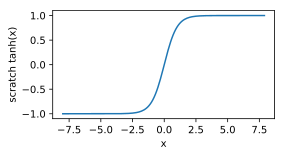

In [28]:
# scratch tanh
def tanh(X):
    return (X.exp() - (1 / X.exp())) / (X.exp() + (1 / X.exp()))

y = tanh(x)
xyplot(x, y, 'scratch tanh')



# xyplot(x, x.grad, 'grad')


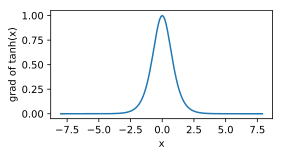

In [9]:
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of tanh')